# Generalized RDT Data Generator

## Import Statements

In [5]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import random
import os
import shutil
import string
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline


## Instructions

Here is what you will need to do to get started:
1. You'll need an image of the RDT. It should be cropped so just the RDT is shown. We don't want any whitespace as padding to the image. You should name it whatever you listed above as TEST_IMAGE_FILENAME. It should also be a png
2. You should have another image that includes dimensions for your RDT. This is more for your own use, but is very useful as you try to play around with data generation. It should be named whatever you named DIMENSIONS_IMAGE_FILENAME. It should also be a png.


## RDT Filenames

In [ ]:
RDT_NAME = "SD_Bioline"
DIMENSIONS_IMAGE_FILENAME = RDT_NAME + "_DIMENSIONS.png"
TEST_IMAGE_FILENAME = RDT_NAME + "_PACKAGE.png"
RDT_DEFAULT_FILE_NAME = RDT_NAME + "_DEFAULT.png"

# Make sure files exist for the above filenames before moving on

## What does the RDT look like?

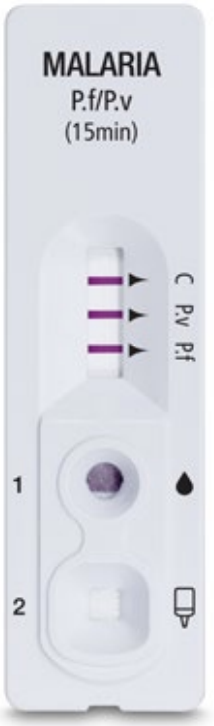

In [8]:
PYTHON_PIL_IMAGE = Image.open(TEST_IMAGE_FILENAME)
PYTHON_PIL_IMAGE

## What does the Dimensions File look like?

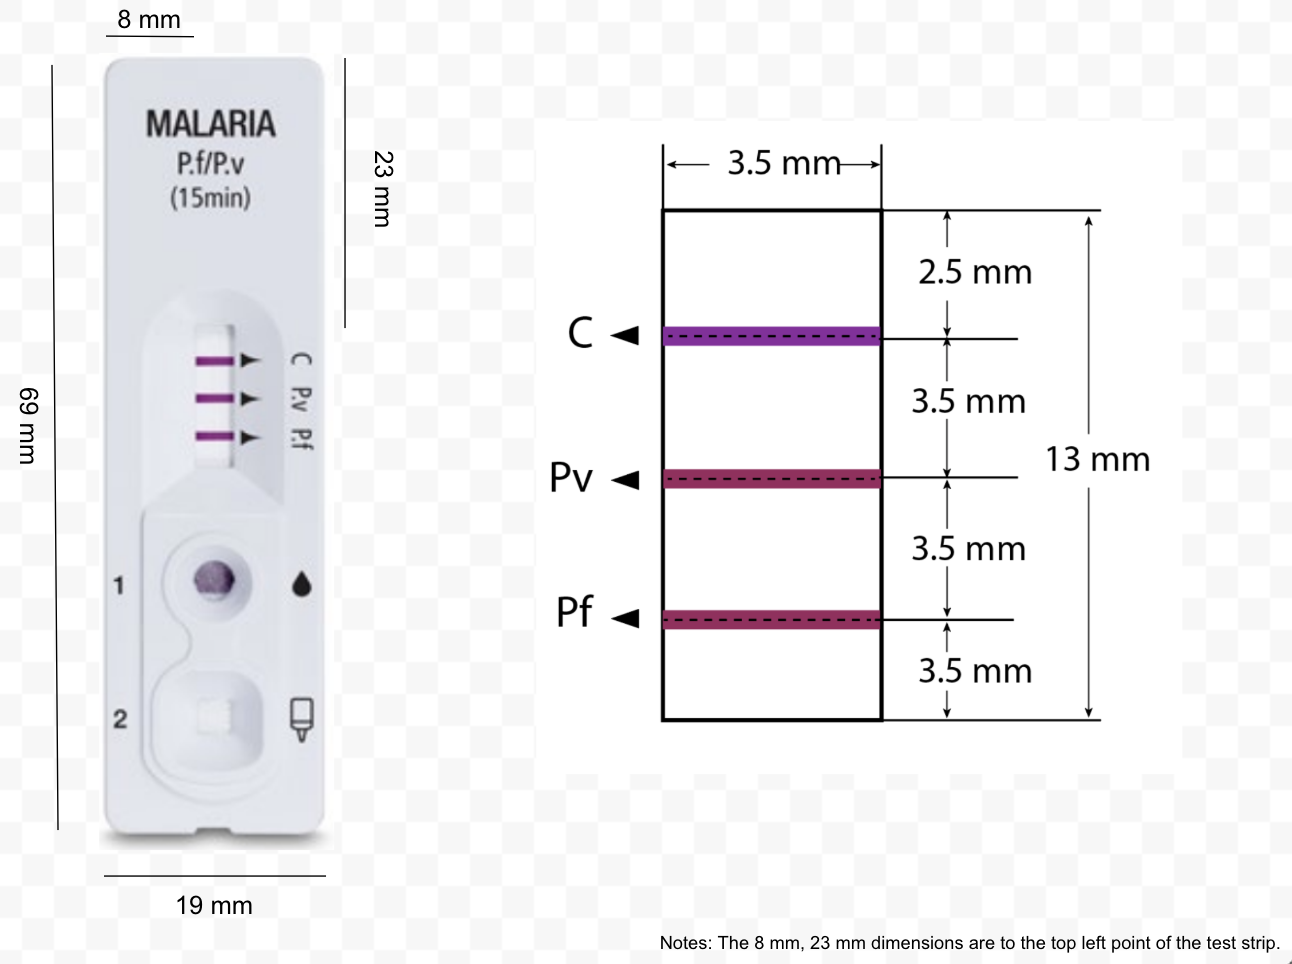

In [9]:
Image.open(DIMENSIONS_IMAGE_FILENAME)

## RDT Specific Data (in mm)

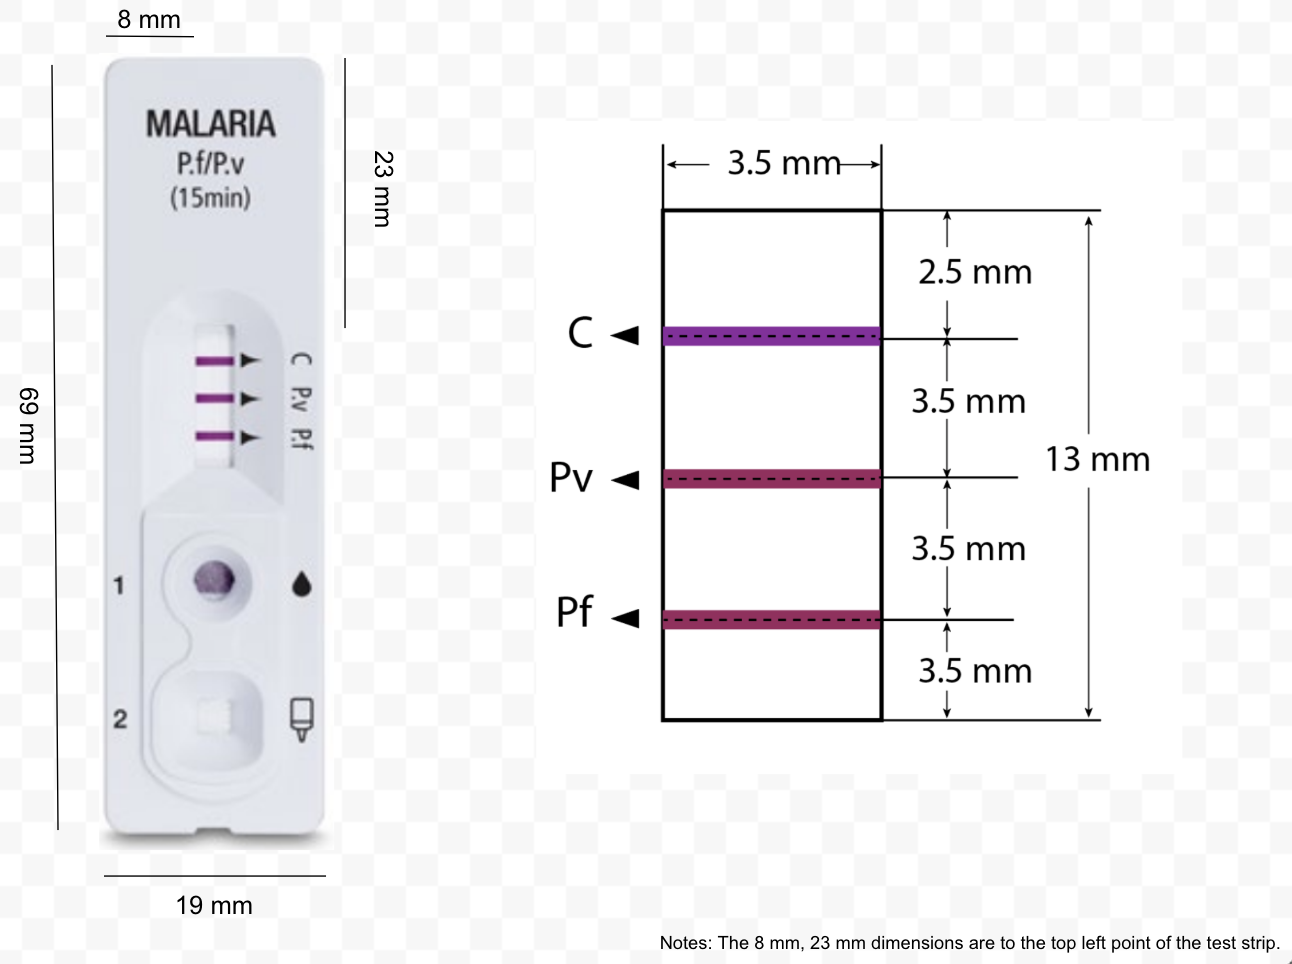

In [7]:
PHYSICAL_TEST_WIDTH = 19.0 # mm
PHYSICAL_TEST_HEIGHT = 69.0 # mm
PHYSICAL_TEST_DIST_TO_STRIP_FROM_Y = 23.0 # mm 
PHYSICAL_TEST_DIST_TO_STRIP_FROM_X = 8.0 # mm 
PHYSICAL_TEST_STRIP_WIDTH = 3.0 # mm
PHYSICAL_TEST_STRIP_HEIGHT = 13.0 # mm
CL_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP = 3.0 # relative to top, in mm
TL1_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP = 6.5 # relative to top
TL2_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP = 10 # relative to top

PHYSICAL_TEST_LINE_HEIGHT = 0.6 # ALWAYS KEEP THIS THE SAME

## Calculated constants for data generation
This data creates constant values in pixels based on the physical dimensions of the RDT in question. NOTE: There may some random values added or subtracted (eg, -1.5 or +5). These were made after seeing the outputted RDT and making adjustments accordingly. This will need to be made on a per RDT basis. 

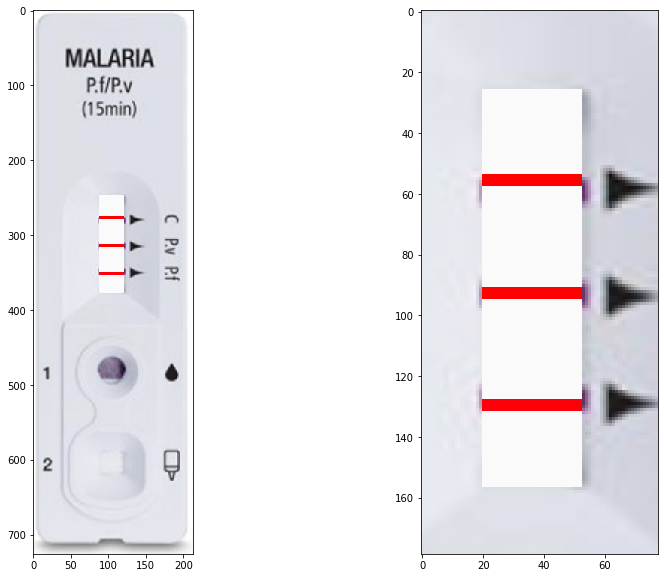

In [14]:
TEST_IMAGE_WIDTH_IN_PX, TEST_IMAGE_HEIGHT_IN_PX = PYTHON_PIL_IMAGE.size # in pixels 


IMAGE_WIDTH_IN_PX = (PHYSICAL_TEST_STRIP_WIDTH * 1.0 / PHYSICAL_TEST_WIDTH) * TEST_IMAGE_WIDTH_IN_PX # in px
HEIGHT_TO_WIDTH_RATIO = PHYSICAL_TEST_STRIP_HEIGHT / PHYSICAL_TEST_STRIP_WIDTH
IMAGE_HEIGHT_IN_PX = (PHYSICAL_TEST_STRIP_HEIGHT * 1.0 / PHYSICAL_TEST_HEIGHT) * TEST_IMAGE_HEIGHT_IN_PX

# HEIGHT_TO_WIDTH_RATIO * IMAGE_WIDTH_IN_PX

STRIP_TOP_LEFT_POS_X = (PHYSICAL_TEST_DIST_TO_STRIP_FROM_X / PHYSICAL_TEST_WIDTH) * TEST_IMAGE_WIDTH_IN_PX - 1.5
STRIP_TOP_LEFT_POS_Y = (PHYSICAL_TEST_DIST_TO_STRIP_FROM_Y / PHYSICAL_TEST_HEIGHT) * TEST_IMAGE_HEIGHT_IN_PX + 5

CL_POSITION_TO_HEIGHT_RATIO = CL_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP / PHYSICAL_TEST_STRIP_HEIGHT
TL1_POSITION_TO_HEIGHT_RATIO = TL1_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP / PHYSICAL_TEST_STRIP_HEIGHT
TL2_POSITION_TO_HEIGHT_RATIO = TL2_HEIGHT_POSITION_REL_TO_TOP_OF_STRIP / PHYSICAL_TEST_STRIP_HEIGHT

CL_POSITION_MIDDLE = CL_POSITION_TO_HEIGHT_RATIO * IMAGE_HEIGHT_IN_PX
CL_POSITION_TOP = CL_POSITION_MIDDLE - ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
CL_POSITION_BOTTOM = CL_POSITION_TOP + ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
CL_POSITION_COORDINATES = (0, CL_POSITION_TOP, IMAGE_WIDTH_IN_PX, CL_POSITION_BOTTOM)

TL1_POSITION_MIDDLE = TL1_POSITION_TO_HEIGHT_RATIO * IMAGE_HEIGHT_IN_PX
TL1_POSITION_TOP = TL1_POSITION_MIDDLE - ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
TL1_POSITION_BOTTOM = TL1_POSITION_TOP + ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
TL1_POSITION_COORDINATES = (0, TL1_POSITION_TOP, IMAGE_WIDTH_IN_PX, TL1_POSITION_BOTTOM)

TL2_POSITION_MIDDLE = TL2_POSITION_TO_HEIGHT_RATIO * IMAGE_HEIGHT_IN_PX
TL2_POSITION_TOP = TL2_POSITION_MIDDLE - ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
TL2_POSITION_BOTTOM = TL2_POSITION_TOP + ((PHYSICAL_TEST_LINE_HEIGHT / 2) / PHYSICAL_TEST_STRIP_HEIGHT) * IMAGE_HEIGHT_IN_PX
TL2_POSITION_COORDINATES = (0, TL2_POSITION_TOP, IMAGE_WIDTH_IN_PX, TL2_POSITION_BOTTOM)

STRIP_DIMENSIONS=(int(IMAGE_WIDTH_IN_PX), int(IMAGE_HEIGHT_IN_PX) - 5)
CL_POSITION = CL_POSITION_COORDINATES
TL1_POSITION = TL1_POSITION_COORDINATES
TL2_POSITION = TL2_POSITION_COORDINATES

DEFAULT_BACKGROUND_COLOR = (250, 250, 250) # I picked 230, 230, 230 instead of 255, 255, 255 to better represent background color of strip in real life settings
DEFAULT_CONTROL_COLOR=(255, 0, 0)
DEFAULT_TL1_COLOR=(255, 0, 0)
DEFAULT_TL2_COLOR=(255, 0, 10)

## FOR CROPPING
## For cropping the image to be passed into the neural net. You can play around with the "2" value that is present here. 
CROP_TOP_LEFT_X = PHYSICAL_TEST_DIST_TO_STRIP_FROM_X - 2 # mm
CROP_TOP_LEFT_Y = PHYSICAL_TEST_DIST_TO_STRIP_FROM_Y - 2 # mm
BOTTOM_RIGHT_X = PHYSICAL_TEST_DIST_TO_STRIP_FROM_X + PHYSICAL_TEST_STRIP_WIDTH + 2  # mm
BOTTOM_RIGHT_Y = PHYSICAL_TEST_DIST_TO_STRIP_FROM_Y + PHYSICAL_TEST_STRIP_HEIGHT + 2 # mm


CROP_TOP_LEFT_IMAGE_POS_X = (CROP_TOP_LEFT_X / PHYSICAL_TEST_WIDTH) * TEST_IMAGE_WIDTH_IN_PX
CROP_TOP_LEFT_IMAGE_POS_Y = (CROP_TOP_LEFT_Y / PHYSICAL_TEST_HEIGHT) * TEST_IMAGE_HEIGHT_IN_PX
CROP_BOTTOM_RIGHT_IMAGE_POS_X = (BOTTOM_RIGHT_X / PHYSICAL_TEST_WIDTH) * TEST_IMAGE_WIDTH_IN_PX
CROP_BOTTOM_RIGHT_IMAGE_POS_Y = (BOTTOM_RIGHT_Y / PHYSICAL_TEST_HEIGHT) * TEST_IMAGE_HEIGHT_IN_PX


## TEST IMAGE GENERATION USING THESE DUMMY VALUES
rcParams['figure.figsize'] = 14, 10

draw_binax(auto_crop = False)
uncropped_img = mpimg.imread(RDT_DEFAULT_FILE_NAME)

draw_binax(auto_crop = True)
cropped_img = mpimg.imread(RDT_DEFAULT_FILE_NAME)

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(uncropped_img);
ax[1].imshow(cropped_img);




In [11]:
def draw_binax(
        control_color=DEFAULT_CONTROL_COLOR, 
        tl_color=DEFAULT_TL1_COLOR, 
        t2_color=DEFAULT_TL2_COLOR, 
        output_name=RDT_DEFAULT_FILE_NAME,
        plus_minus_offset_value=1,
        pixel_offset_value=0,
        auto_crop=True
        ):  
    
    strip = Image.new('RGB', STRIP_DIMENSIONS, color = DEFAULT_BACKGROUND_COLOR)

    draw_rectangle(strip, CL_POSITION, control_color)
    draw_rectangle(strip, TL1_POSITION, tl_color)
    draw_rectangle(strip, TL2_POSITION, t2_color)
    final_strip = strip.filter(ImageFilter.GaussianBlur(radius = 2))
    python_pil_image = Image.open(TEST_IMAGE_FILENAME)
    python_pil_image.paste(strip, (int(STRIP_TOP_LEFT_POS_X), int(STRIP_TOP_LEFT_POS_Y)))
    python_pil_image.save(output_name) # this is the full package with the strip on it
    
    if auto_crop:
        ### CROPPING SECTION OF THIS METHOD ###
        # now let's crop this to be just the portion we want with these defaults
        top_left_x = CROP_TOP_LEFT_IMAGE_POS_X + plus_minus_offset_value*pixel_offset_value
        top_left_y = CROP_TOP_LEFT_IMAGE_POS_Y + plus_minus_offset_value*pixel_offset_value
        bottom_right_x = CROP_BOTTOM_RIGHT_IMAGE_POS_X + plus_minus_offset_value*pixel_offset_value
        bottom_right_y = CROP_BOTTOM_RIGHT_IMAGE_POS_Y + plus_minus_offset_value*pixel_offset_value

        full_image = Image.open(output_name)
        cropped_image = full_image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y)) 
        cropped_image.save(output_name)


In [13]:
def draw_rectangle(pil_image, position, color):
    line = ImageDraw.Draw(pil_image) 
    line.rectangle(position, fill=color)

### LABEL SHOULD BE 0 ###
def generate_valid_test_no_malaria(sample_count = 1000):
    
    # the valid color range was decided based on manual inspection
    valid_color_range = [(i, i, i) for i in range(250)]    
    invalid_color_range = [(i, i, i) for i in range(251, 256)]
    
    for i in range(sample_count):
        # sample the valid color range array for a color for control lines and the test lines
        cl_color = random.choice(valid_color_range)
        tl1_color = random.choice(invalid_color_range)
        tl2_color = random.choice(invalid_color_range)

        filename = 'train/0/' + str(i) + '_0.png'
        
        # call draw_binax to generate the actual image
        draw_binax(cl_color, tl1_color, tl2_color, filename)

### LABEL SHOULD BE A 1###
def generate_valid_test_t1_positive_only(sample_count = 1000):
    
    # the valid and invalid color ranges were decided based on manual inspection
    valid_color_range = [(i, i, i) for i in range(251)]    
    invalid_color_range = [(i, i, i) for i in range(251, 256)]
    
    for i in range(sample_count):
        # sample the valid color range array for a color for control lines and the test lines
        cl_color = random.choice(valid_color_range)
        tl1_color = random.choice(valid_color_range)
        tl2_color = random.choice(invalid_color_range)

        filename = 'train/1/' + str(i) + '_1.png'
        
        # call draw_binax to generate the actual image
        draw_binax(cl_color, tl1_color, tl2_color, filename)

### LABEL SHOULD BE A 2###
def generate_valid_test_t2_positive_only(sample_count = 1000):
    
    # the valid and invalid color ranges were decided based on manual inspection
    valid_color_range = [(i, i, i) for i in range(250)]    
    invalid_color_range = [(i, i, i) for i in range(251, 256)]
    
    for i in range(sample_count):
        # sample the valid color range array for a color for control lines and the test lines
        cl_color = random.choice(valid_color_range)
        tl1_color = random.choice(invalid_color_range)
        tl2_color = random.choice(valid_color_range)

        filename = 'train/2/' + str(i) + '_2.png'
        
        # call draw_binax to generate the actual image
        draw_binax(cl_color, tl1_color, tl2_color, filename)


### LABEL SHOULD BE A 3###
def generate_valid_test_positive_for_both_malarias(sample_count = 1000):
    
    # the valid color range was decided based on manual inspection
    valid_color_range = [(i, i, i) for i in range(250)]    
    
    for i in range(sample_count):
        # sample the valid color range array for a color for control lines and the test lines
        cl_color = random.choice(valid_color_range)
        tl1_color = random.choice(valid_color_range)
        tl2_color = random.choice(valid_color_range)

        filename = 'train/3/' + str(i) + '_3.png'
        
        # call draw_binax to generate the actual image
        draw_binax(cl_color, tl1_color, tl2_color, filename)


### LABEL SHOULD BE 4 ###
def generate_invalid_randomize_positive(sample_count = 1000):
    # the valid and invalid color ranges were decided based on manual inspection
    full_color_range = [(i, i, i) for i in range(256)]    
    invalid_color_range = [(i, i, i) for i in range(250, 256)]
    
    for i in range(sample_count):
        # sample the valid color range array for a color for control lines and the test lines
        cl_color = random.choice(invalid_color_range)
        tl1_color = random.choice(full_color_range)
        tl2_color = random.choice(full_color_range)

        filename = 'train/4/' + str(i) + '_4.png'
        
        # call draw_binax to generate the actual image
        draw_binax(cl_color, tl1_color, tl2_color, filename)
    



In [310]:
sample_count = 4000
generate_valid_test_no_malaria(sample_count = sample_count)
generate_valid_test_t1_positive_only(sample_count = sample_count)
generate_valid_test_t2_positive_only(sample_count = sample_count)
generate_valid_test_positive_for_both_malarias(sample_count = sample_count)
generate_invalid_randomize_positive(sample_count = sample_count)

In [311]:
### move the first 300 files from the train folder to the test folder and 300 from the train folder to the 
import os
import shutil

### 300 to test folder
for i in range(300):
    shutil.move("train/0/" + str(i) + "_0.png", "test/0/" + str(i) + "_0.png")
    shutil.move("train/1/" + str(i) + "_1.png", "test/1/" + str(i) + "_1.png")
    shutil.move("train/2/" + str(i) + "_2.png", "test/2/" + str(i) + "_2.png")
    shutil.move("train/3/" + str(i) + "_3.png", "test/3/" + str(i) + "_3.png")
    shutil.move("train/4/" + str(i) + "_4.png", "test/4/" + str(i) + "_4.png")

### 300 to validate folder
for i in range(301,601):
    shutil.move("train/0/" + str(i) + "_0.png", "validate/0/" + str(i) + "_0.png")
    shutil.move("train/1/" + str(i) + "_1.png", "validate/1/" + str(i) + "_1.png")
    shutil.move("train/2/" + str(i) + "_2.png", "validate/2/" + str(i) + "_2.png")
    shutil.move("train/3/" + str(i) + "_3.png", "validate/3/" + str(i) + "_3.png")
    shutil.move("train/4/" + str(i) + "_4.png", "validate/4/" + str(i) + "_4.png")
    